# ML for dummies

This notebook will show easy but practical uses of Machine learning for beginers.  
The goal is to help poeple who find the subject interesting to have handsdown examples

## Table of contents

1.  Supervised and Unsupervised (RL?)  
    a.  Anomaly detection  
2.  Intro to ML  
    a.  Loss and optimization  
    b.  GD  
3.  Regression and classification  
    a.  Linear regression  
    b.  SVM, logistic  
4.  Clustering  
    a.  KNN & k-means  
5.  NN  
    a.  Perceptron  
    b.  Sigmoid, ReLU, tanh, etc.  
    c.  From Perceptron to a network  
    d.  Loss -\> Derivation -\> Update  
    e.  Dense, Conv, RNN  
6.  Summery  
    a.  Real world examples  
        1) YOLO
        2) BERT
        3) Deepfake (GANs)

In [27]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt


In [205]:
from sklearn import datasets, svm,  linear_model
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score

## Linear Regression

In [282]:
# sklean comes with tens of databsets to learn from
# we will use the diabetes data set
X, y = datasets.load_diabetes(return_X_y=True)

## Diabetes dataset
Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of `n = 442` diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

For example `X[0]` has the following values  

| Age | Sex | Body mass index | Average blood pressure | S1 | S2 | S3 | S4 | S5 | S6 |  
|------|------|------|------|------|------|------|------|------|------|
|0.0381|0.0507|0.0617|0.0219|-0.0442|-0.0348|-0.0434|-0.0026|0.0199|-0.0176|

While the target `y[0]`

| measure of disease progression |
|------|
| 151.0| 

An important thing to notice is the data is already normalized. We should alway work with normalized data

In [271]:
# Now we shape our data to be simple and easy to explore
# We use the `shape` attribute to understand the data we want to learn from
print(X.shape)
print(X[:,2].shape)

# We can use the reshape the data using slicing and `reshape` method
X = X[:,2].reshape(-1, 1)
print(X.shape)

# Now we use a great util from sklearn which helps us to split the data randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Exmaple for a the data set values: \n', X_train[0])

(442, 10)
(442,)
(442, 1)
Exmaple for a the data set values: 
 [-0.03099563]


In [74]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Coefficients: 
 [972.87627375]
Mean squared error: 3934.07
Coefficient of determination: 0.32


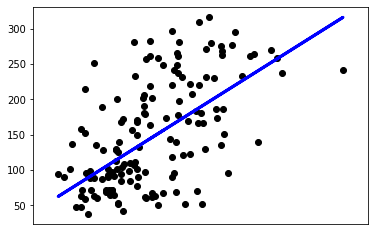

In [273]:
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks()

plt.show()

## SVM

The data that we are interested in is made of 8x8 images of digits, let's
have a look at the first 4 images, stored in the `images` attribute of the
dataset. Note that each image must have the same size. For these
images, we know which digit they represent: it is given in the 'target' of
the dataset.

In [281]:
X,y = datasets.load_iris(return_X_y=True)
X[0]

array([5.1, 3.5, 1.4, 0.2])

# Iris Dataset
This data sets consists of 3 different types of irises: Setosa, Versicolour, and Virginica. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

For example `X[0]` has the following values  

| Sepal Length | Sepal Width | Petal Length | Petal Width |
|:------:|:------:|:------:|:------:|
|5.1|3.5|1.4|0.2|

While the target `y[0]`

| irise |
|:------:|
|0|

`0` is the categorical number of _I. setosa_. The full match is

| irise | cat. # |
|:------|:------:|
|_I. setosa_|0|
|_I. versicolor_|1|
|_I. virginica_|2|

In [284]:
# Util methods for visualizing the data

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classificaition(model, title, X):
    """Plot the data and the classificaion contours one over the other 
    """
    fig, sub = plt.subplots(1, 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    clf, title, ax = (model, title, sub)
    
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

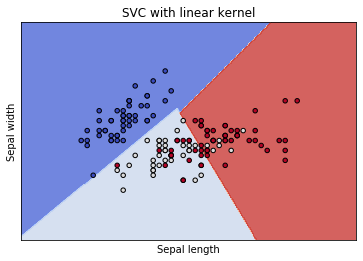

In [286]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
model = svm.SVC(kernel='linear')
model.fit(X, y)

# title for the plots
title = 'SVC with linear kernel'

plot_classificaition(model, title, X)

## Mmnist Dataset

This is a copy of the test set of the UCI ML hand-written digits datasets https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where each class refers to a digit.

Preprocessing programs made available by NIST were used to extract normalized bitmaps of handwritten digits from a preprinted form.

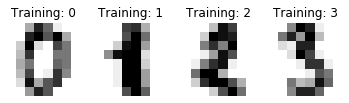

In [253]:
# We reshape our dataset from (1797, 64) to (1797,8,8) to show them
example_images = X.reshape(-1, 8, 8)
images_and_labels = list(zip(example_images, y))

_, axes = plt.subplots(1,4)
for ax, (image, label) in zip(axes, images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

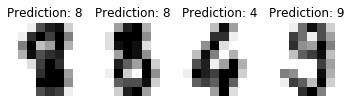

In [264]:
# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(X)
data = X.reshape(n_samples, -1)

# Create a classifier: a support vector classifier
classifier = svm.SVC()

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.5, shuffle=False)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)    

images_and_predictions = list(zip(X[n_samples // 2:].reshape(-1, 8, 8), predicted))

_, axes = plt.subplots(1,4)
for ax, (image, prediction) in zip(axes[:], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)